# Solving Set of Mesh Equation of an Electrical Circuit 

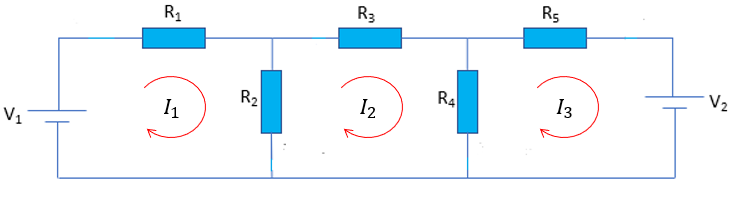

## Kirchhoff's Voltage Law (KVL) for Three Meshes

### **Step 1: Define Mesh Currents**
We define the mesh currents as:

- $ I_1 $  → Current in **Mesh 1** (left loop)
- $ I_2 $ → Current in **Mesh 2** (right loop)
- $ I_3 $ → Current in **Mesh 3** (middle loop)

We assume all currents are in a **clockwise direction**.

---

### **Step 2: Write KVL Equations for Each Mesh**

#### **Mesh 1 (Left Loop)**
Applying KVL:

$$
V_1 - I_1 R_1 - I_1R_2 + I_2R_2 = 0
$$

Rearrange:

$$
I_1 (R_1 + R_2) + I_2(-R_2) = V_1
$$

---

#### **Mesh 2 (Middle Loop)**
Applying KVL:

$$
-I_2R_2 -I_2R_3 - I_2R_4 + I_3R_4 + I_2R_2 = 0
$$

Rearrange:

$$
I_1(-R_2) + I_2(R_2 - R_3 - R_4) + I_3R_4 = 0
$$

---

#### **Mesh 3 (Right Loop)**
Applying KVL:

$$
-I_3R_5 - V_2 + I_3R_4 - I_2R_4 = 0
$$

Rearrange:

$$
I_2(R_4) + I_3(R_4 - R_5) = V_2
$$

---

### **Final KVL Equations for Three Meshes**

1. $$ I_1 (R_1 + R_2) + I_2(-R_2) = V_1 $$
2. $$ I_1(-R_2) + I_2(R_2 - R_3 - R_4) + I_3R_4 = 0 $$
3. $$ I_2(R_4) + I_3(R_4 - R_5) = V_2 $$

These three equations can be solved simultaneously to find $ I_1 $, $ I_2 $, and $ I_3 $. The above equation can be written in matrix form as
\begin{equation}
\begin{pmatrix}
(R_1 + R_2) & (-R_2)            & 0 \\
(-R_2)      & (R_2 - R_3 - R_4) & R_4 \\
(R_4)       & (R_4 - R_5)       & 0
\end{pmatrix}
\begin{pmatrix}
I_1\\
I_2  \\
I_3
\end{pmatrix}=
\begin{pmatrix}
V_1\\
0  \\
V_2
\end{pmatrix}
\end{equation}

In [1]:
import numpy as np

In [2]:
V1 = 130
V2 = 50
R1 = 10
R2 = 8
R3 = 5
R4 = 2
R5 = 5

In [3]:
a00 = R1 + R2
a01 = -R2
a02 = 0
a10 = -R2
a11 = R2 - R3 - R4
a12 = R4
a20 = R4
a21 = R4 - R5
a22 = 0
A = np.array([[a00, a01, a02], [a10, a11, a12], [a20, a21, a22]], dtype=float)
b = np.array([V1, 0, V2], dtype=float)

## Gauss Elimination Method

In [4]:
# Gauss Elimination Method

def GaussElimination(A, b):
    x = np.copy(b)
    n = len(b)
    #Elimination phase
    for k in range(n-1):             # Fixed row/ Column no.
        for i in range(k+1, n):      # Row no. to be transformed
            if A[i, k] != 0:
                factor = A[i, k]/A[k, k]
                A[i, : ] = A[i, : ] - factor*A[k, : ]
                b[i] = b[i] - factor*b[k]
    
    # Back substitution
    for k in range(n-1, -1, -1):
        x[k] = (b[k] - np.dot(A[k, k+1:n], x[k+1:n]))/A[k,k]

    return x

In [5]:
x = GaussElimination(A, b)
print(x)

[ -0.26315789 -16.84210526   7.36842105]


## Gauss Seidal Method

In [6]:
# Gauss Seidal Method

def GaussSeidel(A, b, maxiter=10, tol=1e-6):
    row, col = A.shape
    x = np.zeros_like(b)
    for iter in range(maxiter):
        for i in range(row):
            x_old = x.copy()
            j = i
            x[i] = (b[i] - np.sum(A[i, :j]*x[:j]) - np.sum(A[i, j+1:]*x[j+1:]))/A[i,i]
            err = np.abs(x_old -x)
            if all(errval < tol for errval in err) == True:
                break
    return x

In [7]:
x = GaussSeidel(A, b, maxiter=10, tol=1e-6)
print(x)

[ -0.26315789 -16.84210526   7.36842105]
